# Importing the Data

In [24]:
path='11th_hour_political_tweets.csv'

In [25]:
import pandas as pd

In [26]:
data = pd.read_csv(path, sep = '|')
include = ['object', 'float', 'int']
columns = ['last_updated', 'tweet_id', 'created_at', 'user_location', 'full_text', 'quote_count', 'reply_count', 'retweet_count', 'favorite_count']
use_data = data[columns]

In [27]:
use_data.describe(include = include, datetime_is_numeric = True)

,last_updated,tweet_id,created_at,user_location,full_text,quote_count,reply_count,retweet_count,favorite_count
count,46043,4.604100e+04,46041,40264,46041,44641,44633.000000,46036,46043.000000
unique,41640,NaN,45608,6071,45905,486,NaN,3428,NaN
top,2019-04-20T17:38:25.000+05:30,NaN,0,Others,The RSS &amp; BJP do not allow for dialogue or...,0,NaN,0.0,NaN
freq,5,NaN,4,10715,16,25713,NaN,5734,NaN
mean,NaN,1.106724e+18,NaN,NaN,NaN,NaN,32.878319,NaN,440.911691
std,NaN,3.553557e+16,NaN,NaN,NaN,NaN,304.689587,NaN,2647.626138
min,NaN,0.000000e+00,NaN,NaN,NaN,NaN,0.000000,NaN,0.000000
25%,NaN,1.100843e+18,NaN,NaN,NaN,NaN,0.000000,NaN,2.000000
50%,NaN,1.107695e+18,NaN,NaN,NaN,NaN,1.000000,NaN,17.000000
75%,NaN,1.118480e+18,NaN,NaN,NaN,NaN,7.000000,NaN,131.000000


# Data Cleaning & Analysis

## Locations

In [28]:
loc = pd.DataFrame(use_data['user_location'])
location = loc[loc.user_location != 'Others'].dropna()

In [29]:
location['user_location'] = location['user_location'].str.rstrip()
location['user_location'] = location['user_location'].astype('str')

In [30]:
import spacy
from spacy import displacy 
from numpy import NaN
nlp = spacy.load('en_core_web_sm')

In [31]:
for i in location.index:
  if (len(location['user_location'][i].split()) > 1):
    doc = nlp(location['user_location'][i])
    displacy.render(doc, style="ent")
    ch = [ent.text for ent in doc.ents if ent.label_ in ['GPE']]
    if (len(ch) > 0):
      location['user_location'][i] = ch[0]
    else:
      location['user_location'][i] = NaN

/usr/local/lib/python3.10/dist-packages/spacy/displacy/__init__.py:215: UserWarning: [W006] No entities to visualize found in Doc object. If this is surprising to you, make sure the Doc was processed using a model that supports named entity recognition, and check the `doc.ents` property manually if necessary.
  warnings.warn(Warnings.W006)


In [32]:
location[location['user_location'] != "nikhilwagle23@gmailcom"]
use_data.loc[:, 'user_location'] = location['user_location']
use_data = use_data.replace(["nikhilwagle23@gmailcom", "wwwnitingadkariorg", "sg@ThePrintin"], NaN)
use_data = use_data.replace(["NBC", "Bronx"], "New York")

<ipython-input-32-99322c9b4fce>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  use_data.loc[:, 'user_location'] = location['user_location']


In [33]:
un = location['user_location'].dropna()

<Axes: >

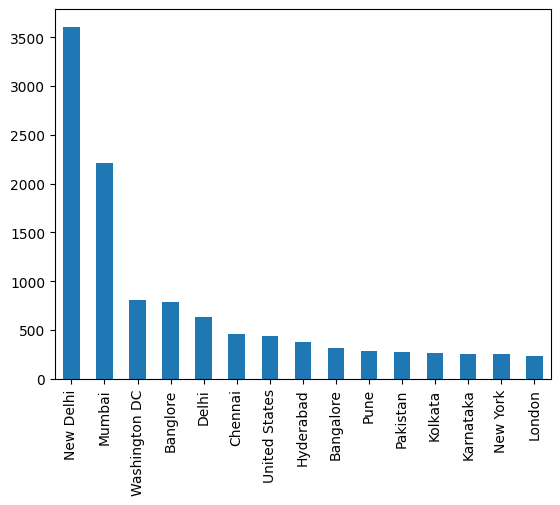

In [34]:
p = un.value_counts()
dp = p.head(15)
dp.plot(kind = "bar")

## Counts


In [35]:
for i in range(5, 9):
  use_data.loc[:,columns[i]] = pd.to_numeric(use_data[columns[i]], errors='coerce')

<ipython-input-35-1b3c90fc651f>:2: DeprecationWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  use_data.loc[:,columns[i]] = pd.to_numeric(use_data[columns[i]], errors='coerce')


In [36]:
use_data[columns[-4:]].fillna(0)

,quote_count,reply_count,retweet_count,favorite_count
0,0.0,4.0,113.0,113.0
1,0.0,0.0,5.0,5.0
2,0.0,4.0,31.0,31.0
3,0.0,0.0,3.0,3.0
4,0.0,0.0,9.0,9.0
...,...,...,...,...
46038,0.0,0.0,6.0,6.0
46039,0.0,0.0,2.0,2.0
46040,0.0,1.0,26.0,26.0
46041,0.0,0.0,1.0,1.0


Tweet with maximum Retweets

In [37]:
print(use_data[use_data['retweet_count'] == use_data['retweet_count'].max()].full_text)

38469    Next time we have a gov shutdown, Congressiona...
Name: full_text, dtype: object


Tweet with minimum Retweets

In [38]:
print(use_data[use_data['retweet_count'] == use_data['retweet_count'].min()].full_text)

8        PAPPU's lawyer to reply court latest by10.30 a...
11       On this Women's Day, let's look back and see h...
15       @Mayor17Ian @marklevinshow She shouldn’t have ...
45       I strongly condemn Modiji for making unethical...
46       @sumitkashyapjha BJP made @kanhaiyakumar what ...
                               ...                        
45999    TY to the #MovetheMoneyCoalition for your unwa...
46015    @Kanth60581327 Any national or international s...
46025    Amit Shah blames Jawaharlal Nehru, who died in...
46026    @Ishrat Jahan always assists the needy people....
46037    #OppnAbusesChowkidar | SHAMEFUL: National Conf...
Name: full_text, Length: 5734, dtype: object


Tweet with maximum replies

In [39]:
print(use_data[use_data['reply_count'] == use_data['reply_count'].max()].full_text)

22132    Congress: “We’re going to need a copy of the P...
Name: full_text, dtype: object


Tweet with maximum favorites

In [40]:
print(use_data[use_data['favorite_count'] == use_data['favorite_count'].max()].full_text)

38469    Next time we have a gov shutdown, Congressiona...
Name: full_text, dtype: object


Influential Locations

In [41]:
inf_loc = use_data.groupby('user_location')['retweet_count'].sum()

<Axes: xlabel='user_location'>

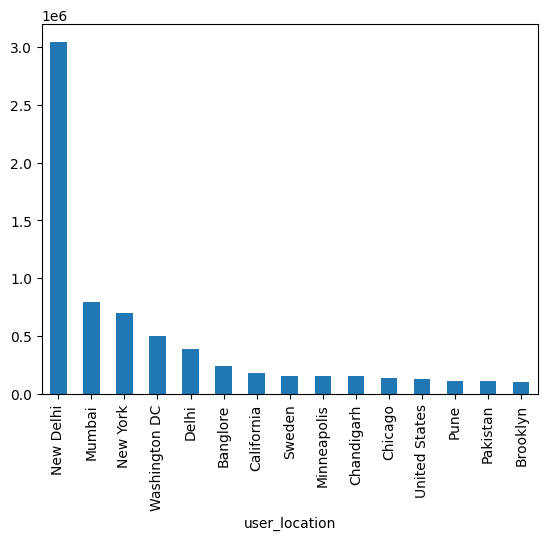

In [42]:
influent_city = inf_loc.sort_values(ascending = False).head(15)
influent_city.plot(kind = "bar")

Locations where most arguments happen

In [43]:
rep_loc = use_data.groupby('user_location')['reply_count'].sum()

<Axes: xlabel='user_location'>

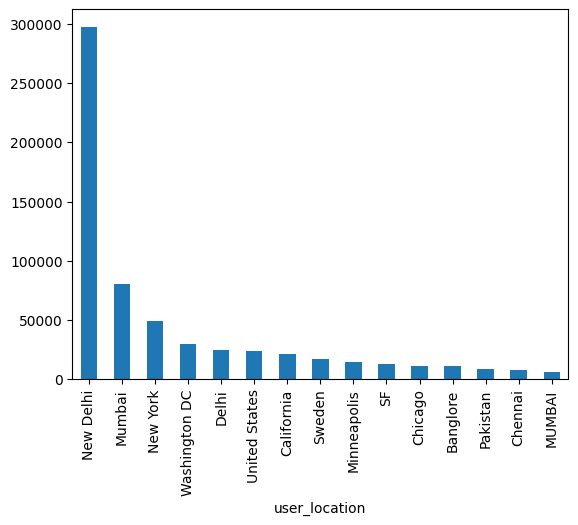

In [44]:
rep_city = rep_loc.sort_values(ascending = False).head(15)
rep_city.plot(kind = "bar")

Locations where people find support in their ideologies

<Axes: xlabel='user_location'>

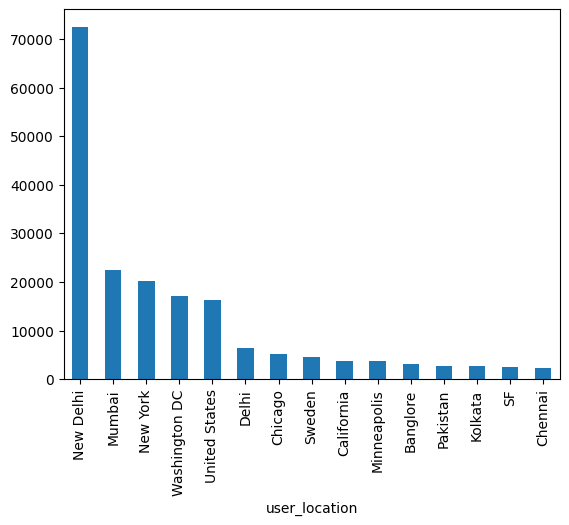

In [45]:
sup_loc = use_data.groupby('user_location')['quote_count'].sum()
sup_city = sup_loc.sort_values(ascending = False).head(15)
sup_city.plot(kind = "bar")

# HashTags Analysis

In [46]:
import re

use_data['hashtags'] = use_data['full_text'].apply(lambda x: re.findall(r'\#\w+', str(x)))


<Axes: >

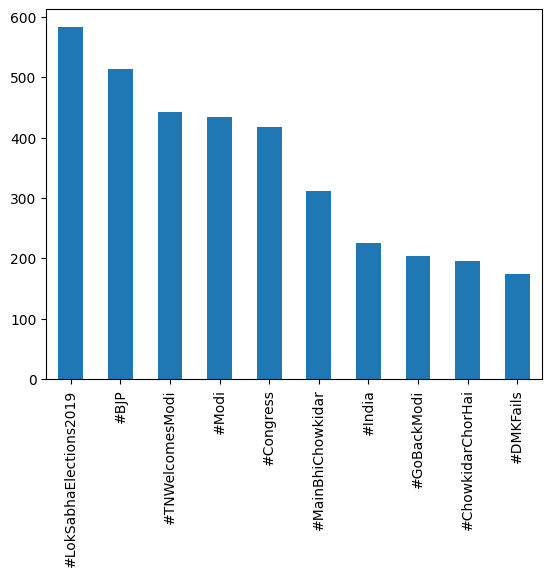

In [47]:
# Frequency analysis on HashTags
import pandas as pd

# Create a list of all hashtags
all_hashtags = []
for hashtags in use_data['hashtags']:
    all_hashtags += hashtags
    
# Create a Series of hashtags with their counts
hashtag_counts = pd.Series(all_hashtags).value_counts()

# print(hashtag_counts)
# Display the top 10 hashtags by frequency
hashtag_counts.head(10).plot(kind = "bar")



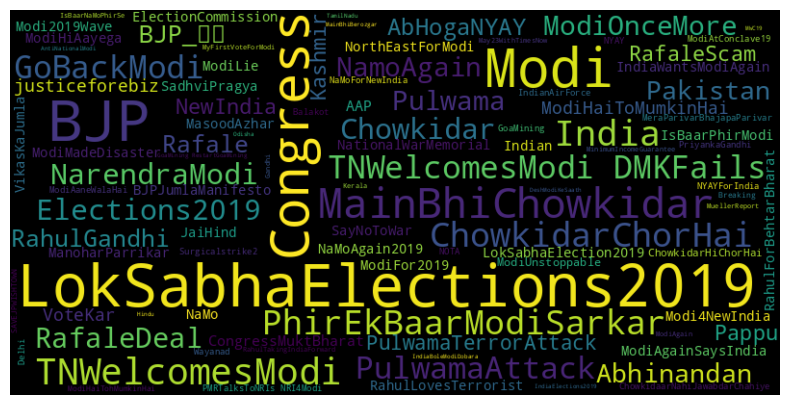

In [48]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

new_hashs = use_data[['hashtags']]
# Combine all hashtags into a single string

#Removing NaN Values
new_hashs = new_hashs[new_hashs['hashtags'].apply(lambda x: x != [])]
# new_hashs.head()

hashtags_combined = ' '.join(new_hashs['hashtags'].explode().astype(str))


# Generate word cloud
wordcloud = WordCloud(width=800, height=400, max_words=100, background_color='black').generate(hashtags_combined)

# Display word cloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()


Location *Analysis* On hashtags


In [49]:
loc_data = use_data[['created_at','full_text','hashtags','user_location']]

In [50]:
# Remove rows with empty hashtags
loc_data = loc_data[loc_data['hashtags'].apply(lambda x: x != [])]
# Remove rows with empty locations
loc_data = loc_data[loc_data['user_location'].notna()]
# loc_data.head(20)

In [51]:
# Group the data by user_location and count the frequency of each hashtag
hashtags_by_location = loc_data.explode('hashtags').groupby('user_location')['hashtags'].value_counts().reset_index(name='count')

In [52]:
# Sort the data by location and count
hashtags_by_location = hashtags_by_location.sort_values(['count','user_location'], ascending=[False, True])

In [53]:
# Print the most popular hashtags for each location
i=0
for location in hashtags_by_location['user_location'].unique():
    i=i+1
    print(f"Most popular hashtags in {location}:")
    print(hashtags_by_location[hashtags_by_location['user_location'] == location].head())
    print()
    if(i==5):
        break

Most popular hashtags in New Delhi:
     user_location                hashtags  count
7454     New Delhi  #LokSabhaElections2019    107
7455     New Delhi                    #BJP     49
7456     New Delhi     #ElectionsWithTimes     38
7457     New Delhi               #Congress     37
7458     New Delhi          #Elections2019     30

Most popular hashtags in Chennai:
     user_location         hashtags  count
1871       Chennai  #TNWelcomesModi     68
1872       Chennai        #DMKFails     30
1873       Chennai             #BJP     17
1874       Chennai      #GoBackModi     16
1875       Chennai            #Modi     13

Most popular hashtags in Mumbai:
     user_location                hashtags  count
6130        Mumbai                   #Modi     55
6131        Mumbai                    #BJP     46
6132        Mumbai  #LokSabhaElections2019     45
6133        Mumbai               #Congress     19
6134        Mumbai             #GoBackModi     17

Most popular hashtags in Goa:
     u

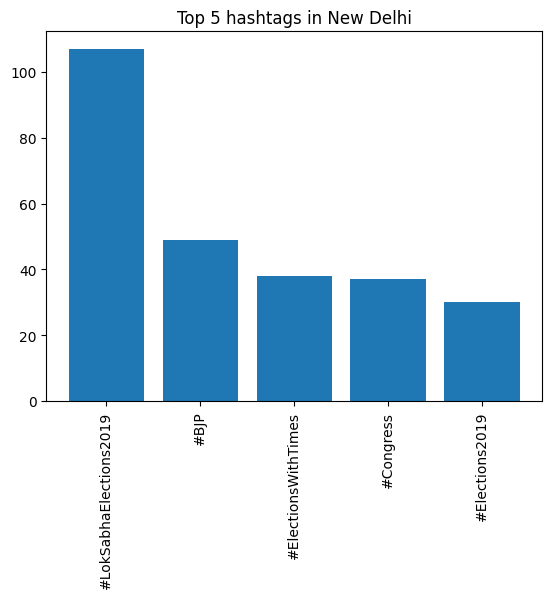

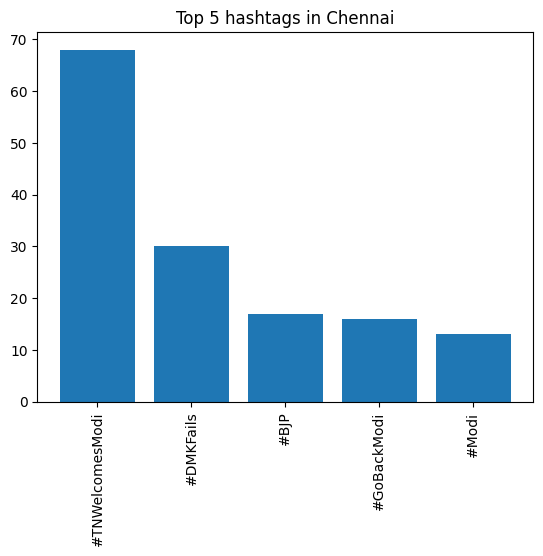

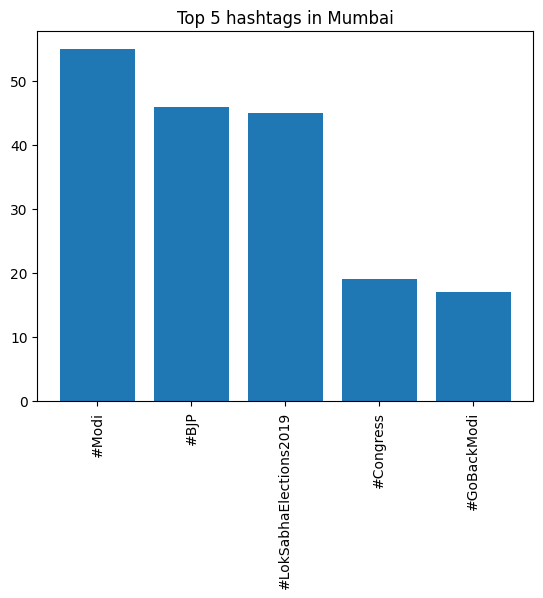

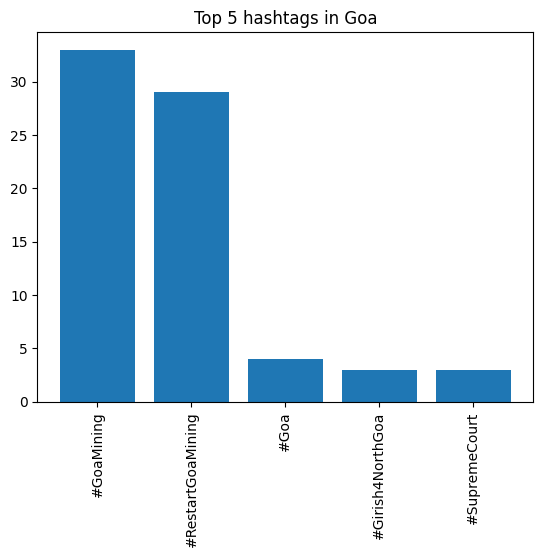

/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 2349 (\N{DEVANAGARI LETTER BHA}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Matplotlib currently does not support Devanagari natively.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 2327 (\N{DEVANAGARI LETTER GA}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


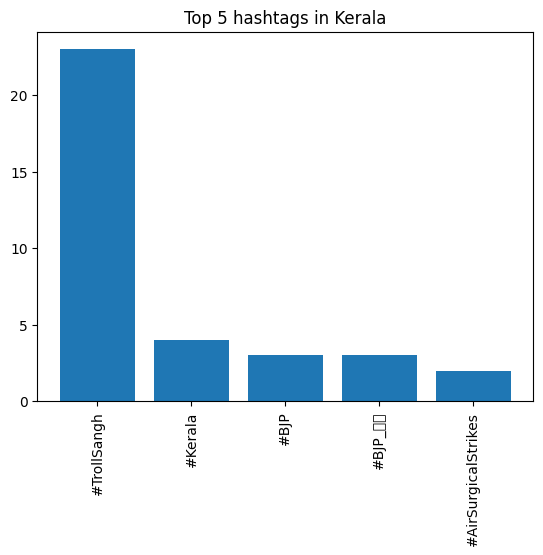

In [54]:
import matplotlib.pyplot as plt
i=0
# Plot the top 5 hashtags for top 5 locations
for location in hashtags_by_location['user_location'].unique():
    i=i+1
    plt.figure()
    plt.title(f"Top 5 hashtags in {location}")
    top_hashtags = hashtags_by_location[hashtags_by_location['user_location'] == location].head()
    plt.bar(top_hashtags['hashtags'], top_hashtags['count'])
    plt.xticks(rotation=90)
    plt.show()
    if(i==5):
        break

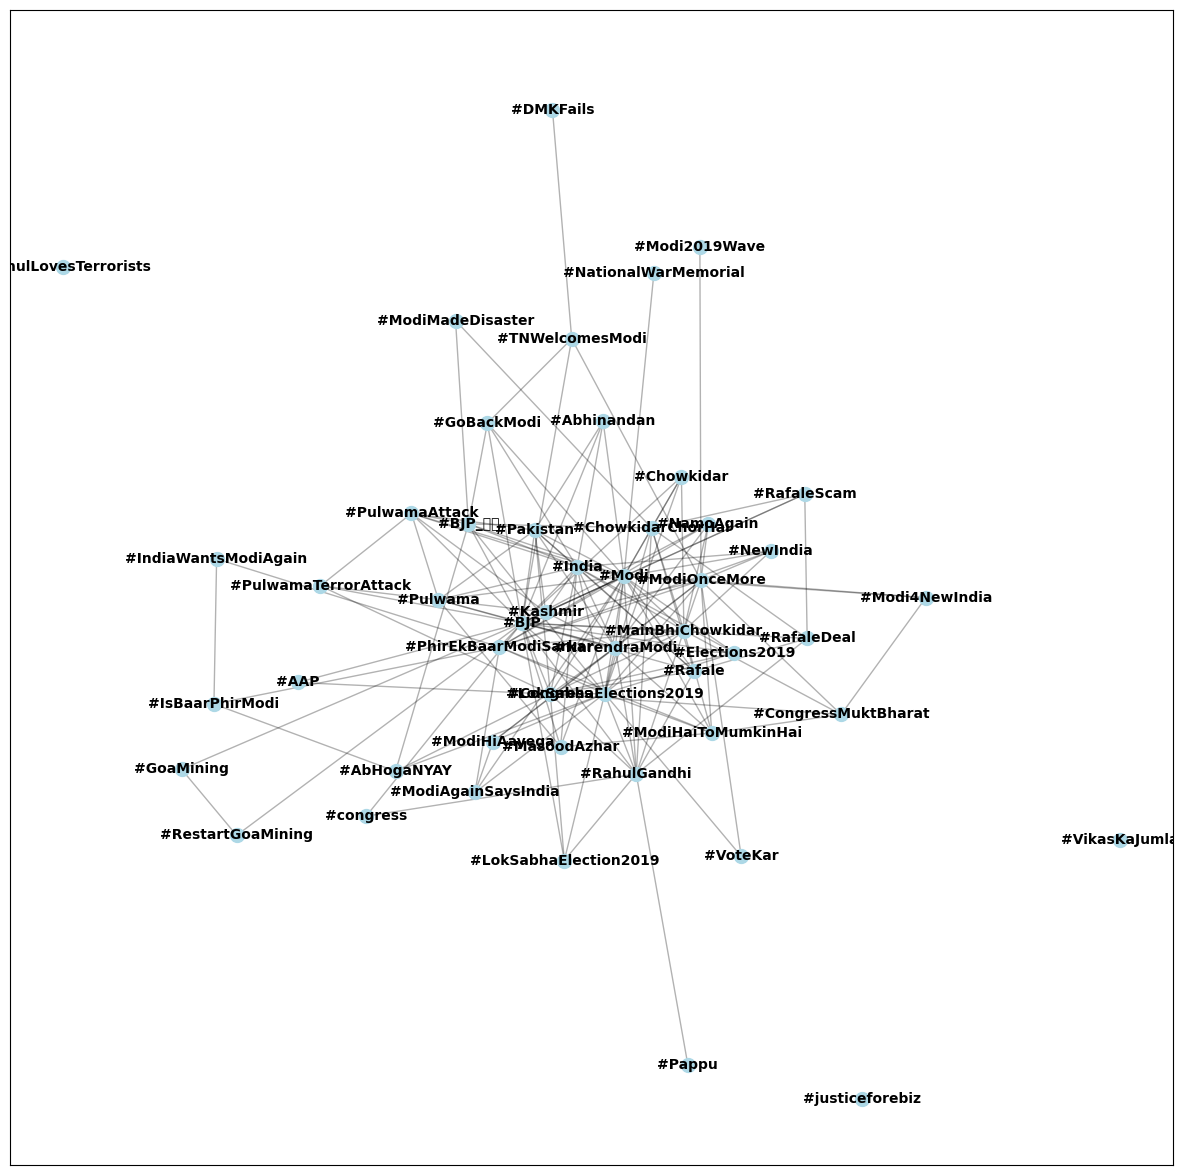

In [55]:
# create a co-occurrence matrix for the hashtags
n_top_hashtags = 50
top_hashtags = hashtag_counts.head(n_top_hashtags).index
cooccurrence_matrix = pd.DataFrame(0, index=top_hashtags, columns=top_hashtags)

# set threshold for co-occurrence
threshold = 2

for tweet_hashtags in use_data['hashtags']:
    tweet_hashtags = list(filter(lambda h: h in top_hashtags, tweet_hashtags))
    for i in range(len(tweet_hashtags)):
        for j in range(i+1, len(tweet_hashtags)):
            cooccurrence_matrix.loc[tweet_hashtags[i], tweet_hashtags[j]] += 1
            cooccurrence_matrix.loc[tweet_hashtags[j], tweet_hashtags[i]] += 1

# create a network graph of the co-occurrence matrix
import networkx as nx
import matplotlib.pyplot as plt

# only include edges that meet the threshold
edges = []
weights = []
for i in range(len(top_hashtags)):
    for j in range(i+1, len(top_hashtags)):
        if cooccurrence_matrix.iloc[i,j] > threshold:
            edges.append((top_hashtags[i], top_hashtags[j]))
            weights.append(cooccurrence_matrix.iloc[i,j])

G = nx.Graph()
G.add_nodes_from(top_hashtags)
G.add_edges_from(edges)
pos = nx.spring_layout(G, k=0.5)
plt.figure(figsize=(15, 15))
nx.draw_networkx_nodes(G, pos, node_size=100, node_color='lightblue')
nx.draw_networkx_edges(G, pos, alpha=0.3)
nx.draw_networkx_labels(G, pos, font_size=10, font_weight='bold', font_family='sans-serif')
plt.show()


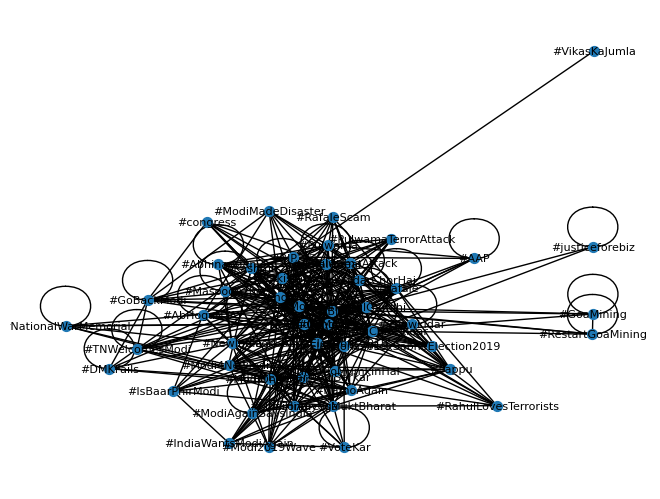

In [56]:
# create a co-occurrence matrix for the hashtags
n_top_hashtags = 50
top_hashtags = hashtag_counts.head(n_top_hashtags).index
cooccurrence_matrix = pd.DataFrame(0, index=top_hashtags, columns=top_hashtags)
for tweet_hashtags in use_data['hashtags']:
    tweet_hashtags = list(filter(lambda h: h in top_hashtags, tweet_hashtags))
    for i in range(len(tweet_hashtags)):
        for j in range(i+1, len(tweet_hashtags)):
            cooccurrence_matrix.loc[tweet_hashtags[i], tweet_hashtags[j]] += 1
            cooccurrence_matrix.loc[tweet_hashtags[j], tweet_hashtags[i]] += 1

# create a network graph of the co-occurrence matrix
import networkx as nx
import matplotlib.pyplot as plt
G = nx.from_pandas_adjacency(cooccurrence_matrix)
pos = nx.spring_layout(G, k=0.5)
nx.draw(G, pos, with_labels = True, node_size = 50, font_size = 8)
plt.show()


Hashtag Growth Over Time


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

hashtag_growth = use_data.loc[:, ["created_at", "hashtags","full_text"]] #make a new dataframe

hashtag_growth = hashtag_growth[hashtag_growth['hashtags'].apply(lambda x: x != [])] #drop null values of hashtags

hashtag_growth['created_at'] = pd.to_datetime(hashtag_growth['created_at'],format='%Y-%m-%dT%H:%M:%S.%f%z')  # convert time stamp to datetime object

# Split the hashtag column into separate rows
hashtags_row =hashtag_growth['hashtags'].apply(pd.Series).stack().reset_index(level=1, drop=True).rename('hashtags')
hashtag_growth = hashtag_growth.drop('hashtags', axis=1).join(hashtags_row)




Time Series Analysis

In [58]:

import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm
import matplotlib.dates as mdates
time_data=hashtag_growth

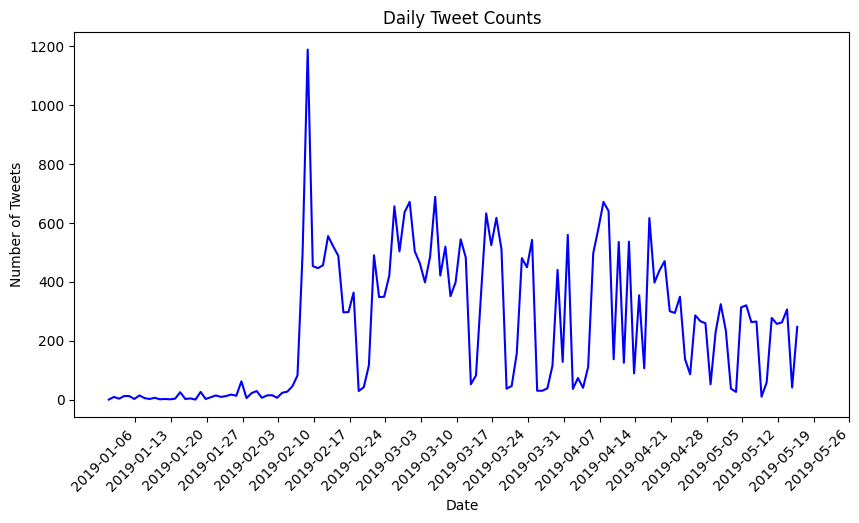

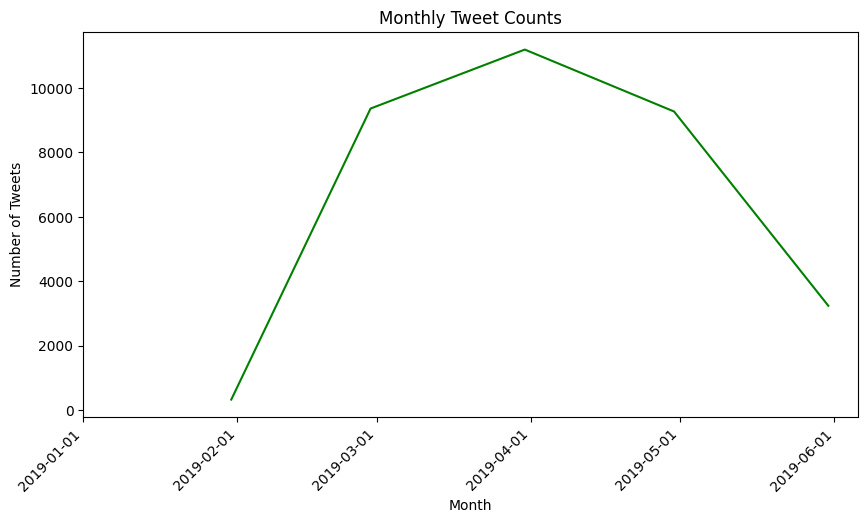

In [59]:
# Set date column as index
time_data.set_index('created_at', inplace=True)

# get daily tweet counts
daily_counts = time_data.resample('D').count()

# get monthly tweet counts
monthly_counts = time_data.resample('M').count()

start_date = '2019-01-01'
end_date = '2019-6-01'

# filter data to only include dates within the specified range
daily_counts = daily_counts[(daily_counts.index >= start_date) & (daily_counts.index <= end_date)]
monthly_counts = monthly_counts[(monthly_counts.index >= start_date) & (monthly_counts.index <= end_date)]

daily_ticks = pd.date_range(start=start_date, end=end_date, freq='W')
monthly_ticks = pd.date_range(start=start_date, end=end_date, freq='MS')
# plot daily tweet# counts
plt.figure(figsize=(10, 5))
plt.plot(daily_counts.index, daily_counts['full_text'], color='blue')
plt.title('Daily Tweet Counts')
plt.xlabel('Date')
plt.ylabel('Number of Tweets')
plt.xticks(daily_ticks, rotation=45, ha='right')
plt.show()

# plot monthly tweet counts
plt.figure(figsize=(10, 5))
plt.plot(monthly_counts.index, monthly_counts['full_text'], color='green' )
plt.title('Monthly Tweet Counts')
plt.xlabel('Month')
plt.ylabel('Number of Tweets')
plt.xticks(monthly_ticks, rotation=45, ha='right')
plt.show()

On Daily Basis

In [61]:
import pandas as pd
import matplotlib.pyplot as plt

hashtag_growth = use_data.loc[:, ["created_at", "hashtags","full_text"]] #make a new dataframe

hashtag_growth = hashtag_growth[hashtag_growth['hashtags'].apply(lambda x: x != [])] #drop null values of hashtags

hashtag_growth['created_at'] = pd.to_datetime(hashtag_growth['created_at'],format='%Y-%m-%dT%H:%M:%S.%f%z')  # convert time stamp to datetime object

# Split the hashtag column into separate rows
hashtags_row =hashtag_growth['hashtags'].apply(pd.Series).stack().reset_index(level=1, drop=True).rename('hashtags')
hashtag_growth = hashtag_growth.drop('hashtags', axis=1).join(hashtags_row)




In [62]:
# Group by hashtag and count the number of occurrences on daily basis
hashtags_count_daily = hashtag_growth.groupby([pd.Grouper(key='created_at', freq='D'), 'hashtags']).size().reset_index(name='daily_count')

# Calculate the growth rate for each hashtag
hashtags_count_daily['daily growth rate'] = hashtags_count_daily.groupby('hashtags')['daily_count'].pct_change()

# Select hashtags with the highest growth rate
top_hashtags_daily = hashtags_count_daily.groupby('hashtags')['daily growth rate'].max().nlargest(10).index.tolist()


On Weekly Basis

In [63]:
# Group by hashtag and count the number of occurrences on weekly basis
hashtags_count_weekly = hashtag_growth.groupby([pd.Grouper(key='created_at', freq='W'), 'hashtags']).size().reset_index(name='weekly_count')

# Calculate the growth rate for each hashtag
hashtags_count_weekly['weekly growth rate'] = hashtags_count_weekly.groupby('hashtags')['weekly_count'].pct_change()

# Select hashtags with the highest growth rate
top_hashtags_weekly = hashtags_count_weekly.groupby('hashtags')['weekly growth rate'].max().nlargest(10).index.tolist()


On Monthly Basis

In [64]:
# Group by hashtag and count the number of occurrences on monthly basis
hashtags_count_monthly = hashtag_growth.groupby([pd.Grouper(key='created_at', freq='M'), 'hashtags']).size().reset_index(name='monthly_count')

# Calculate the growth rate for each hashtag
hashtags_count_monthly['monthly growth rate'] = hashtags_count_monthly.groupby('hashtags')['monthly_count'].pct_change()

# Select hashtags with the highest growth rate
top_hashtags_monthly = hashtags_count_monthly.groupby('hashtags')['monthly growth rate'].max().nlargest(10).index.tolist()

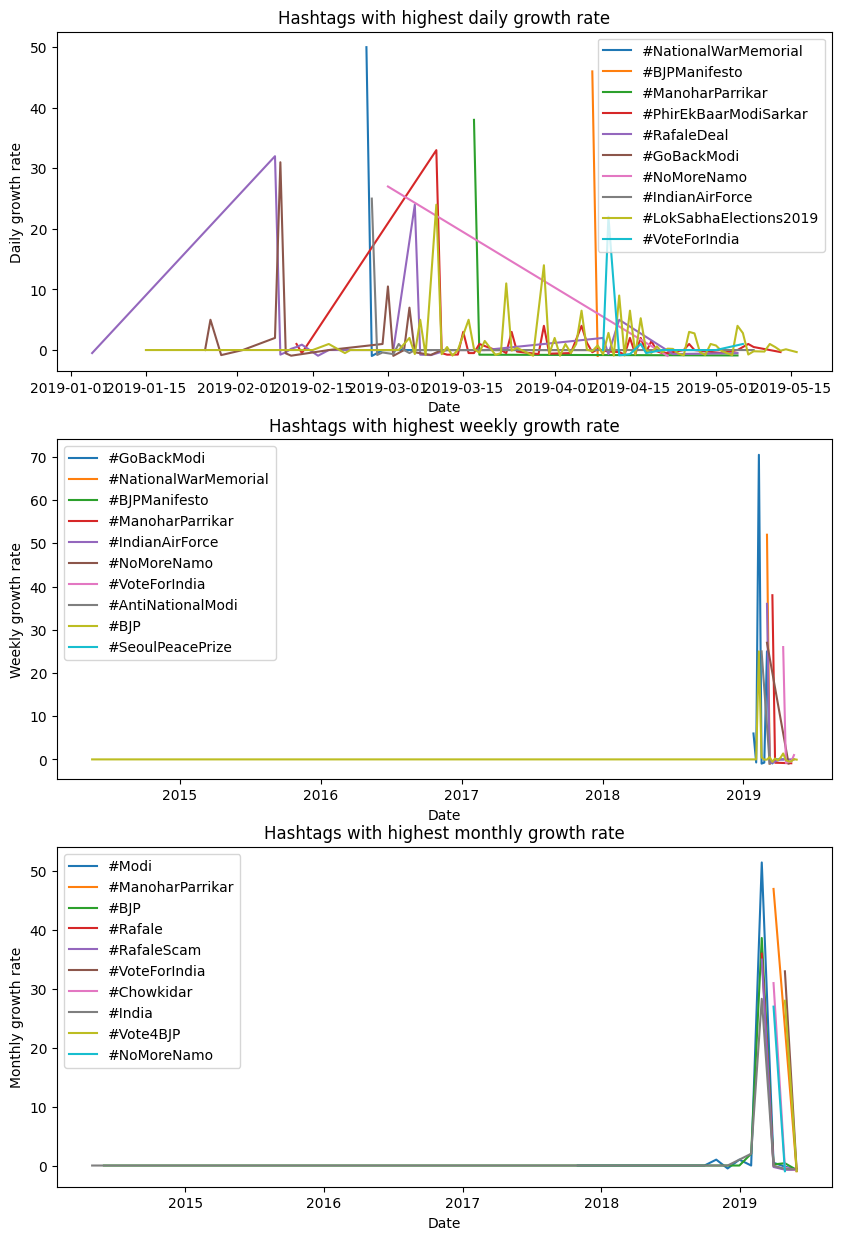

In [65]:
# Plot the growth rate for each hashtag on daily, weekly, and monthly basis
fig, axs = plt.subplots(3, figsize=(10, 15))
for hashtag in top_hashtags_daily:
    subset = hashtags_count_daily[hashtags_count_daily['hashtags'] == hashtag]
    axs[0].plot(subset['created_at'], subset['daily growth rate'], label=hashtag)
axs[0].set_xlabel('Date')
axs[0].set_ylabel('Daily growth rate')
axs[0].set_title('Hashtags with highest daily growth rate')
axs[0].legend(loc='best')

for hashtag in top_hashtags_weekly:
    subset = hashtags_count_weekly[hashtags_count_weekly['hashtags'] == hashtag]
    axs[1].plot(subset['created_at'], subset['weekly growth rate'], label=hashtag)
axs[1].set_xlabel('Date')
axs[1].set_ylabel('Weekly growth rate')
axs[1].set_title('Hashtags with highest weekly growth rate')
axs[1].legend(loc='best')

for hashtag in top_hashtags_monthly:
    subset = hashtags_count_monthly[hashtags_count_monthly['hashtags'] == hashtag]
    axs[2].plot(subset['created_at'], subset['monthly growth rate'], label=hashtag)
axs[2].set_xlabel('Date')
axs[2].set_ylabel('Monthly growth rate')
axs[2].set_title('Hashtags with highest monthly growth rate')
axs[2].legend(loc='best')

# Tags Analysis


In [67]:
import re

use_data['tags'] = use_data['full_text'].apply(lambda x: re.findall(r'\@\w+', str(x)))

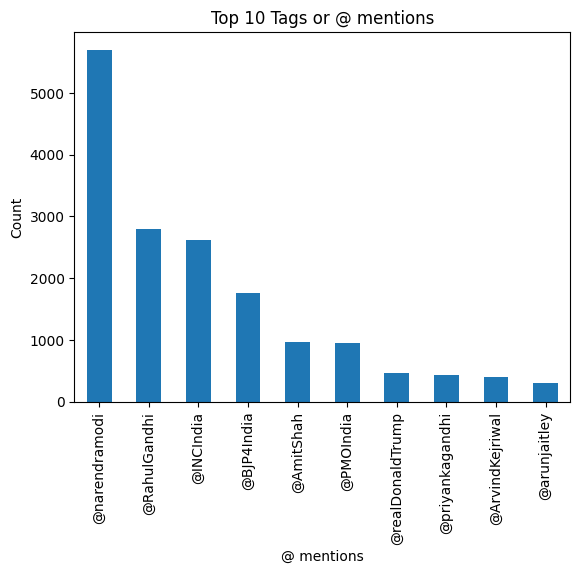

In [68]:
# Frequency analysis on Tags
import pandas as pd

# Create a list of all tags
all_tags = []
for tags in use_data['tags']:
    all_tags += tags
    
# Create a Series of tags with their counts
tag_counts = pd.Series(all_tags).value_counts()


# Display the top 10 tags by frequency
tag_counts.head(10).plot(kind = "bar")
# add title and axis labels
plt.title("Top 10 Tags or @ mentions")
plt.xlabel("@ mentions")
plt.ylabel("Count")

# display plot
plt.show()

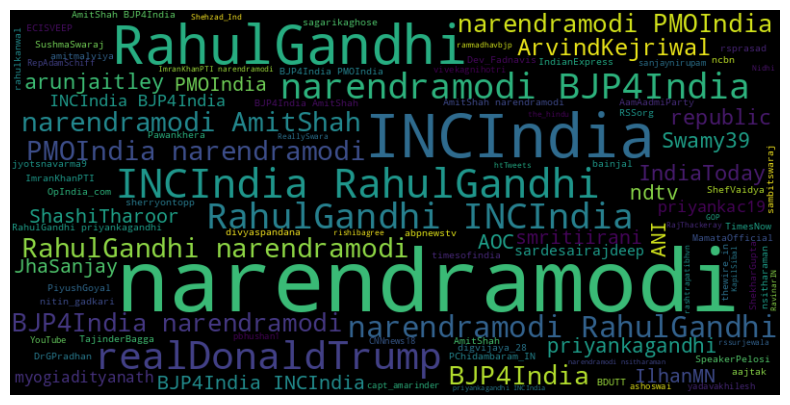

In [69]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

new_tags = use_data[['tags']]
# Combine all tags into a single string

#Removing NaN Values
new_tags = new_tags[new_tags['tags'].apply(lambda x: x != [])]


tags_combined = ' '.join(new_tags['tags'].explode().astype(str))


# Generate word cloud
wordcloud = WordCloud(width=800, height=400, max_words=100, background_color='black').generate(tags_combined)

# Display word cloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

Location Analysis on Tags

In [70]:
loc_data_tags = use_data[['created_at','full_text','tags','user_location']]

In [71]:
# Remove rows with empty tags
loc_data_tags = loc_data_tags[loc_data_tags['tags'].apply(lambda x: x != [])]
# Remove rows with empty locations
loc_data_tags = loc_data_tags[loc_data_tags['user_location'].notna()]


In [72]:
# Group the data by user_location and count the frequency of each tag
tags_by_location = loc_data_tags.explode('tags').groupby('user_location')['tags'].value_counts().reset_index(name='count')

In [73]:
# Sort the data by location and count
tags_by_location = tags_by_location.sort_values(['count','user_location'], ascending=[False, True])

In [74]:
# Print the most popular tags for each location
i=0
for location in tags_by_location['user_location'].unique():
    i=i+1
    print(f"Most popular tags in {location}:")
    print(tags_by_location[tags_by_location['user_location'] == location].head())
    print()
    if(i==5):
        break

Most popular tags in New Delhi:
      user_location           tags  count
11704     New Delhi  @narendramodi    430
11705     New Delhi   @RahulGandhi    343
11706     New Delhi      @INCIndia    213
11707     New Delhi     @BJP4India    141
11708     New Delhi      @AmitShah     73

Most popular tags in Mumbai:
     user_location           tags  count
9624        Mumbai  @narendramodi    308
9625        Mumbai   @RahulGandhi    208
9626        Mumbai      @INCIndia    166
9627        Mumbai     @BJP4India     96
9628        Mumbai      @AmitShah     48

Most popular tags in Banglore:
     user_location           tags  count
1649      Banglore  @narendramodi    125
1650      Banglore   @RahulGandhi     51
1651      Banglore      @INCIndia     47
1652      Banglore     @BJP4India     27
1653      Banglore      @AmitShah     14

Most popular tags in Delhi:
     user_location           tags  count
3790         Delhi  @narendramodi     90
3791         Delhi      @INCIndia     44
3792      

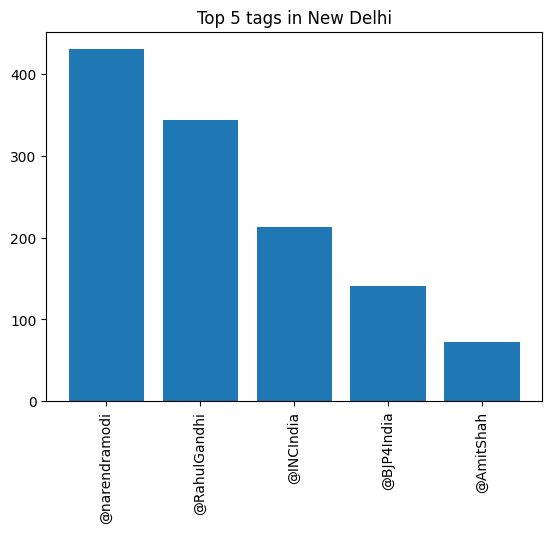

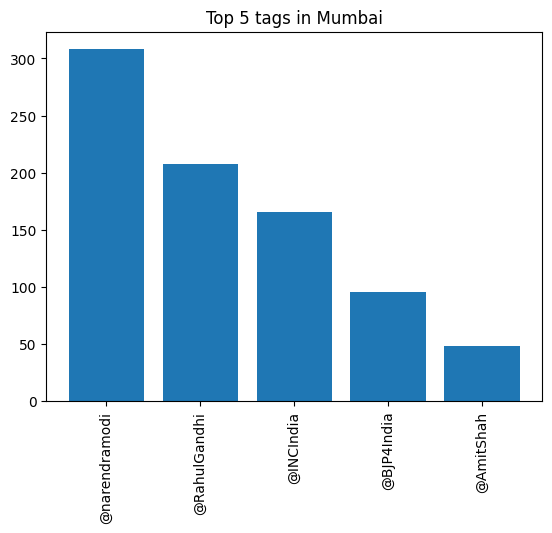

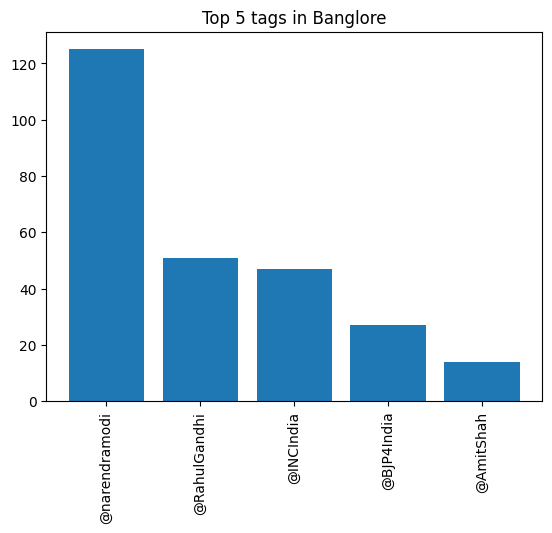

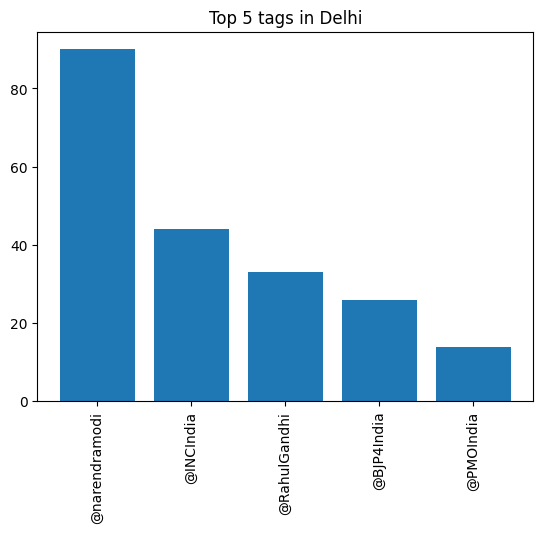

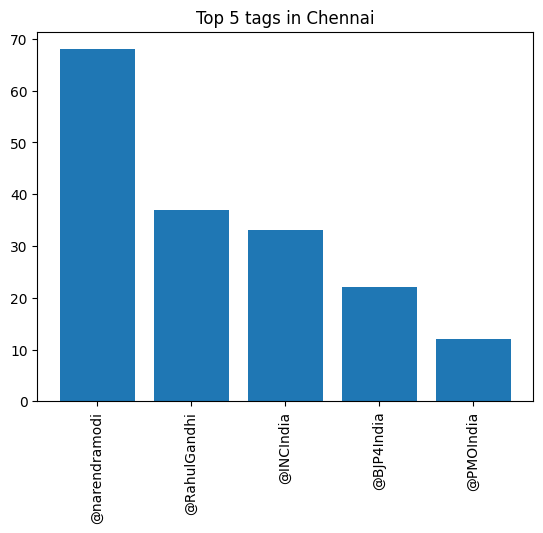

In [75]:
import matplotlib.pyplot as plt
i=0
# Plot the top 5 tags for top 5 locations
for location in tags_by_location['user_location'].unique():
    i=i+1
    plt.figure()
    plt.title(f"Top 5 tags in {location}")
    top_tags = tags_by_location[tags_by_location['user_location'] == location].head()
    plt.bar(top_tags['tags'], top_tags['count'])
    plt.xticks(rotation=90)
    plt.show()
    if(i==5):
        break

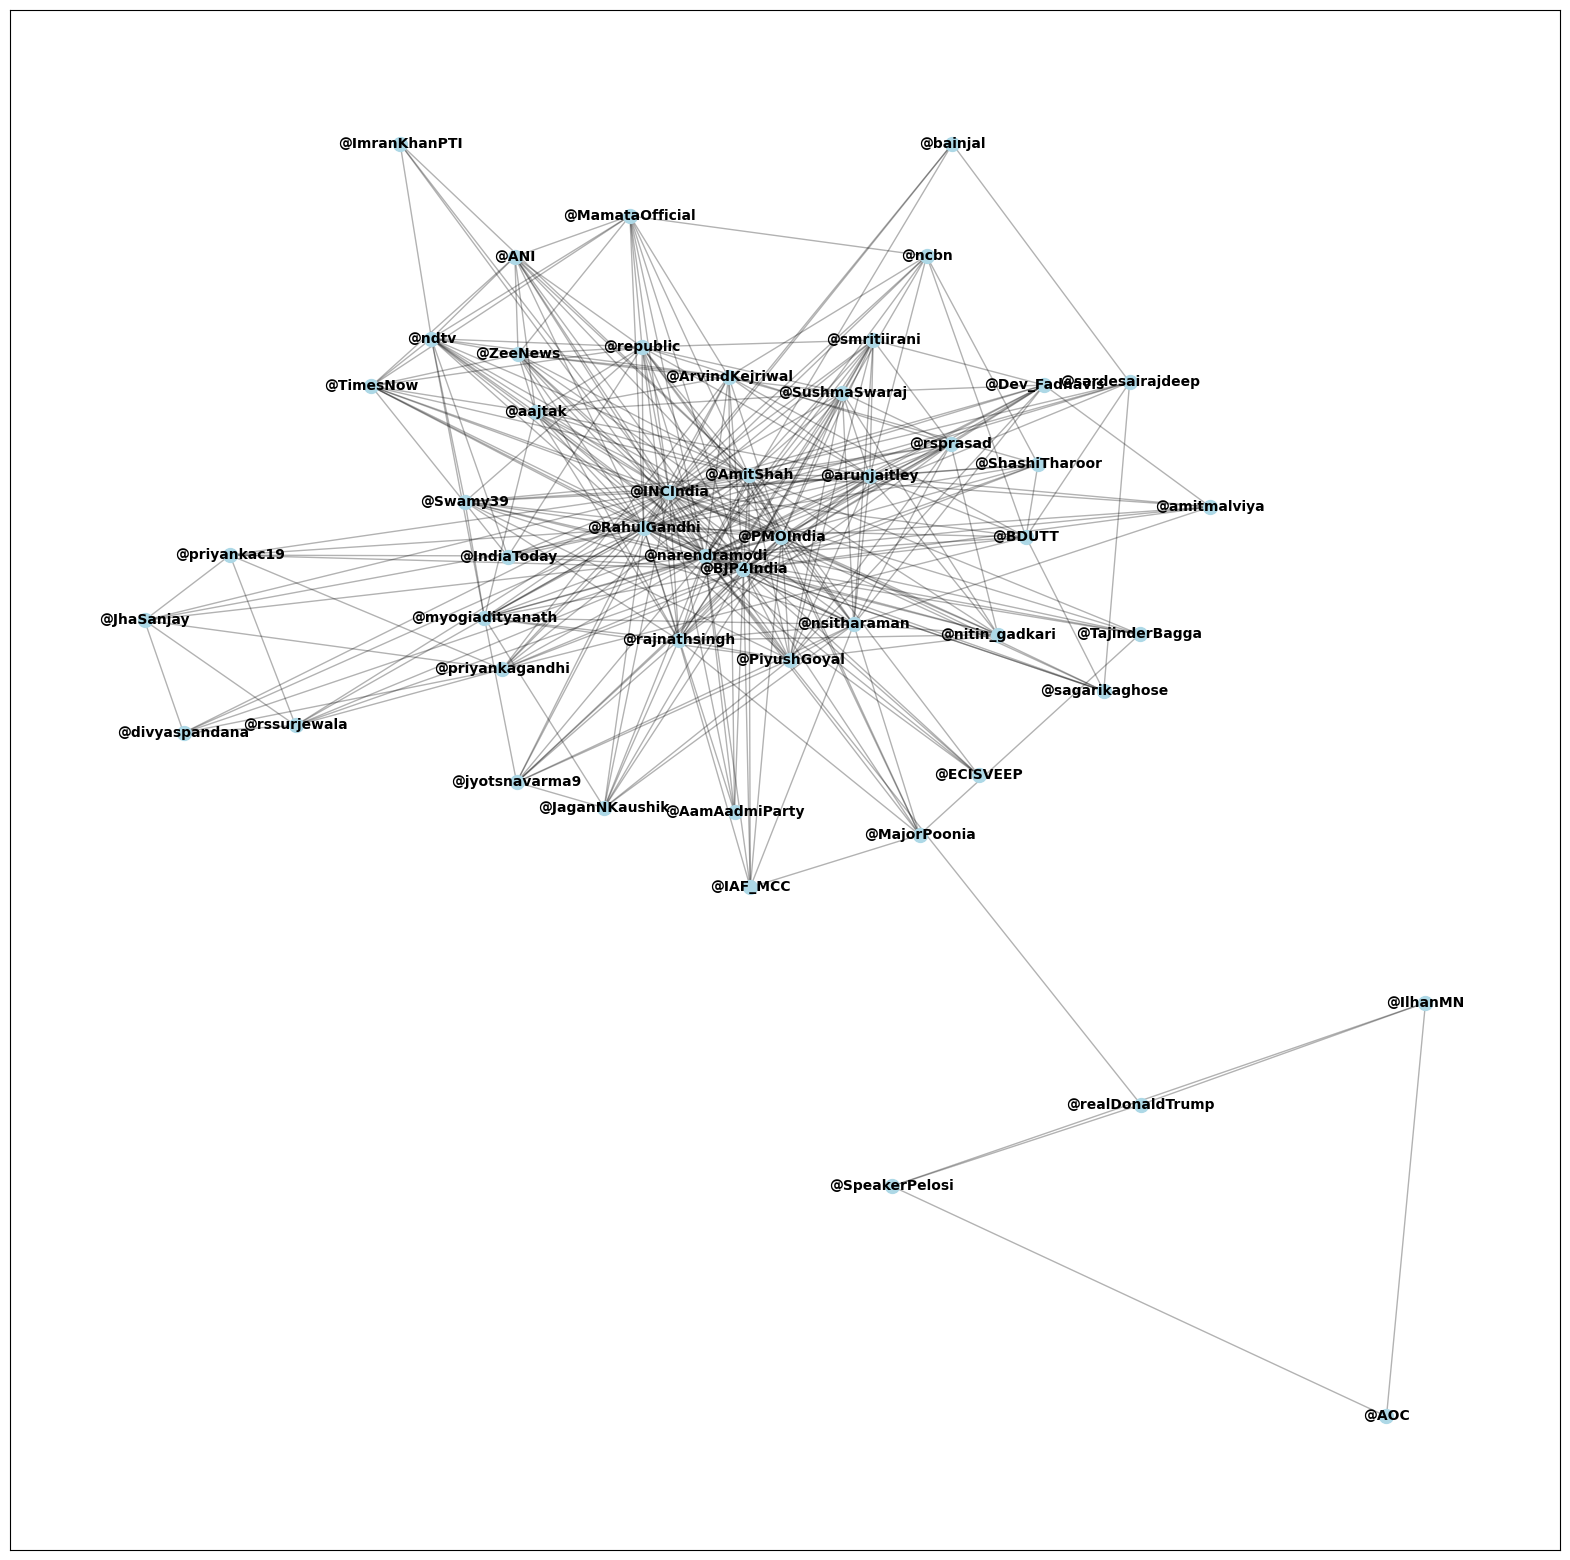

In [76]:
# set the co-occurrence threshold
cooccurrence_threshold = 10

# create a co-occurrence matrix for the tags
n_top_tags = 50
top_tags = tag_counts.head(n_top_tags).index
cooccurrence_matrix_tags = pd.DataFrame(0, index=top_tags, columns=top_tags)


for tweet_tags in use_data['tags']:
    tweet_tags = list(filter(lambda h: h in top_tags, tweet_tags))
    for i in range(len(tweet_tags)):
        for j in range(i+1, len(tweet_tags)):
            cooccurrence_matrix_tags.loc[tweet_tags[i], tweet_tags[j]] += 1
            cooccurrence_matrix_tags.loc[tweet_tags[j], tweet_tags[i]] += 1

# create a network graph of the co-occurrence matrix
import networkx as nx
import matplotlib.pyplot as plt

# only include edges that meet the threshold
edge = []
weight = []
for i in range(len(top_tags)):
    for j in range(i+1, len(top_tags)):
        if cooccurrence_matrix_tags.iloc[i,j] > cooccurrence_threshold:
            edge.append((top_tags[i], top_tags[j]))
            weight.append(cooccurrence_matrix_tags.iloc[i,j])

G = nx.Graph()
G.add_nodes_from(top_tags)
G.add_edges_from(edge)
pos = nx.spring_layout(G, k=0.5)
plt.figure(figsize=(20, 20))
nx.draw_networkx_nodes(G, pos, node_size=100, node_color='lightblue')
nx.draw_networkx_edges(G, pos, alpha=0.3)
nx.draw_networkx_labels(G, pos, font_size=10, font_weight='bold', font_family='sans-serif')
plt.show()


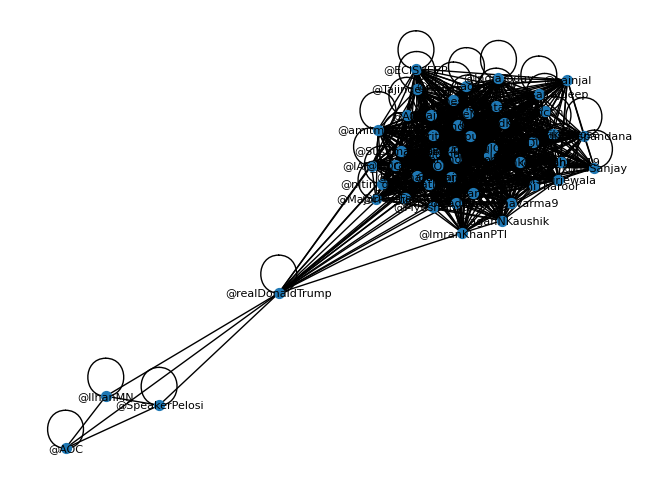

In [77]:
# create a co-occurrence matrix for the tags
n_top_tags = 50
top_tags = tag_counts.head(n_top_tags).index
cooccurrence_matrix_tags = pd.DataFrame(0, index=top_tags, columns=top_tags)
for tweet_tags in use_data['tags']:
    tweet_tags = list(filter(lambda h: h in top_tags, tweet_tags))
    for i in range(len(tweet_tags)):
        for j in range(i+1, len(tweet_tags)):
            cooccurrence_matrix_tags.loc[tweet_tags[i], tweet_tags[j]] += 1
            cooccurrence_matrix_tags.loc[tweet_tags[j], tweet_tags[i]] += 1

# create a network graph of the co-occurrence matrix
import networkx as nx
import matplotlib.pyplot as plt
G = nx.from_pandas_adjacency(cooccurrence_matrix_tags)
pos = nx.spring_layout(G, k=0.5)
nx.draw(G, pos, with_labels = True, node_size = 50, font_size = 8)
plt.show()

Network analysis on the Tags


In [78]:
import pandas as pd
import networkx as nx

In [79]:
tag_network = use_data.loc[:, ["tweet_id","tags"]] #make a new dataframe
tag_network = tag_network[tag_network['tags'].apply(lambda x: x != [])] #drop null values of hashtags


In [80]:
G = nx.DiGraph()

In [81]:
# Iterate over the tags column and add edges to the graph
for tag_list in tag_network.loc[:,"tags"]:
    # tag_list = tag_string.split(',')
    for i in range(len(tag_list)):
        for j in range(i+1, len(tag_list)):
            if not G.has_edge(tag_list[i], tag_list[j]):
                G.add_edge(tag_list[i], tag_list[j], weight=1)
            else:
                G[tag_list[i]][tag_list[j]]['weight'] += 1

In [82]:
G

In [83]:
# Compute degree centrality, betweenness centrality, and eigenvector centrality
degree_centrality = nx.degree_centrality(G)

In [84]:
print("Top 10 users based on degree centrality:")
print(sorted(degree_centrality.items(), key=lambda x: x[1], reverse=True)[:10])

Top 10 users based on degree centrality:
[('@narendramodi', 0.3755255446553701), ('@INCIndia', 0.23219518409988532), ('@BJP4India', 0.20907121926360045), ('@RahulGandhi', 0.18403618295324245), ('@PMOIndia', 0.15071983692190088), ('@AmitShah', 0.14434959867499045), ('@nsitharaman', 0.06918078736144731), ('@arunjaitley', 0.060772072875525544), ('@ArvindKejriwal', 0.059689132373550766), ('@smritiirani', 0.05663141801503376)]


In [85]:
eigenvector_centrality = nx.eigenvector_centrality(G)

In [86]:
print("Top 10 users based on eigenvector centrality:")
print(sorted(eigenvector_centrality.items(), key=lambda x: x[1], reverse=True)[:10])

Top 10 users based on eigenvector centrality:
[('@narendramodi', 0.22510638015627066), ('@INCIndia', 0.18842936637090316), ('@BJP4India', 0.18683862212063435), ('@RahulGandhi', 0.15789466245245765), ('@PMOIndia', 0.15267606717740345), ('@AmitShah', 0.14557737772338353), ('@nsitharaman', 0.10244522361582824), ('@republic', 0.09537167778390258), ('@smritiirani', 0.08881703527836916), ('@arunjaitley', 0.08832634954240615)]


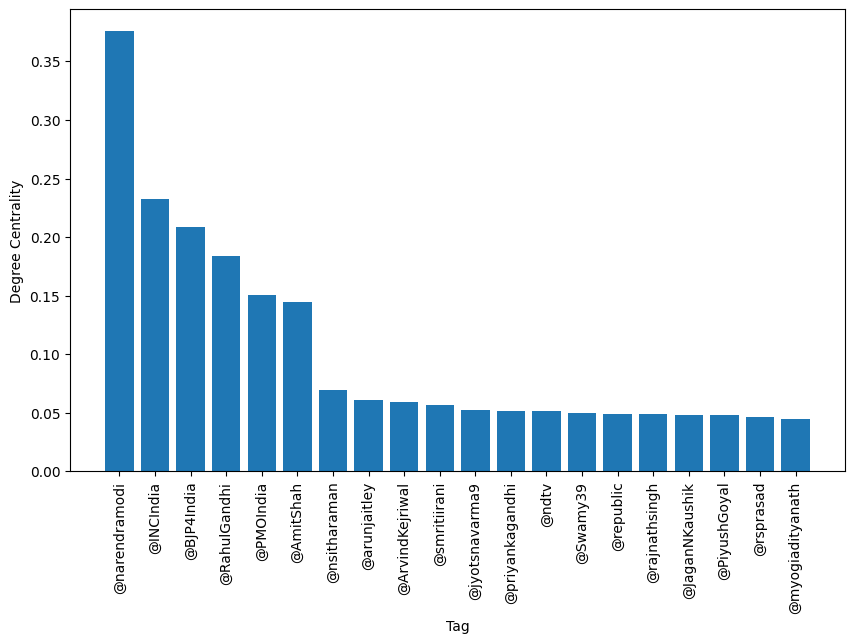

In [87]:
top_nodes = sorted(nx.degree_centrality(G).items(), key=lambda x: x[1], reverse=True)[:20]

# extract the top nodes and their degree centrality values
top_nodes_names = [n[0] for n in top_nodes]
top_nodes_values = [n[1] for n in top_nodes]

# plot the top nodes and their degree centrality values
plt.figure(figsize=(10, 6))
plt.bar(top_nodes_names, top_nodes_values)
plt.title("")
plt.xlabel("Tag")
plt.ylabel("Degree Centrality")
plt.xticks(rotation=90)
plt.show()

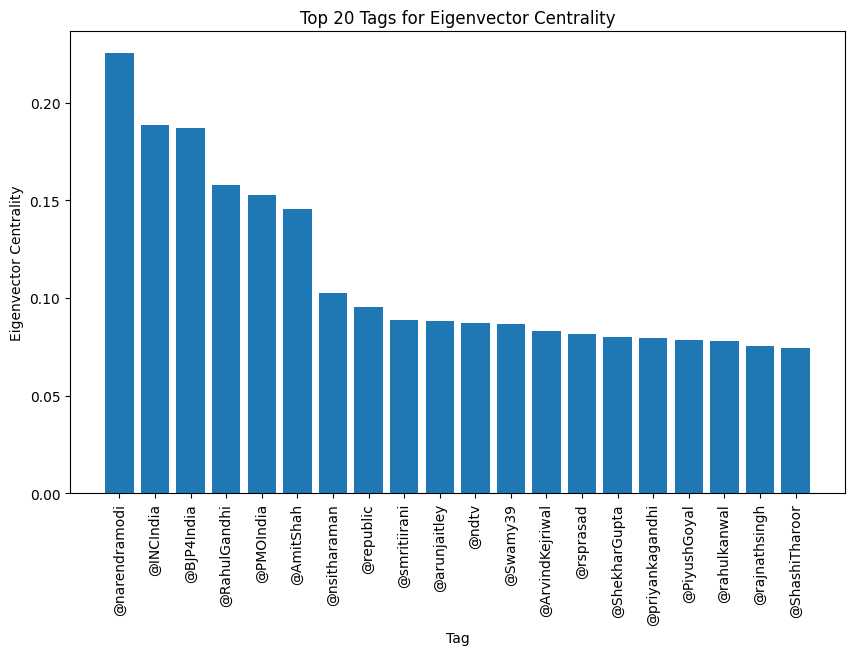

In [88]:
top_20_eig_centrality = sorted(eigenvector_centrality.items(), key=lambda x: x[1], reverse=True)[:20]

# Create a bar chart to visualize the top 20 tags for eigenvector centrality
tags = [x[0] for x in top_20_eig_centrality]
values = [x[1] for x in top_20_eig_centrality]

plt.figure(figsize=(10,6))
plt.bar(tags, values)
plt.xticks(rotation=90)
plt.title('Top 20 Tags for Eigenvector Centrality')
plt.xlabel('Tag')
plt.ylabel('Eigenvector Centrality')
plt.show()

From the chart, we can conclude that there are a few tags that have a high eigenvector centrality score, indicating that they are influential and well-connected within the network of tags mentioned in the tweets. These tags may represent important topics or themes that are being discussed on Twitter.